# 축구 데이터 분석 5주차

In [1]:
!git clone https://github.com/narame7/UOS-FootballDataAnalytics-Tutorial.git

Cloning into 'UOS-FootballDataAnalytics-Tutorial'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 147 (delta 7), reused 0 (delta 0), pack-reused 132 (from 3)
Receiving objects: 100% (147/147), 89.48 MiB | 28.73 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
!ls

sample_data  UOS-FootballDataAnalytics-Tutorial


In [3]:
%cd 'UOS-FootballDataAnalytics-Tutorial/Week 5'

/content/UOS-FootballDataAnalytics-Tutorial/Week 5


In [4]:
!unzip data.zip -d data/ #압축 해제

Archive:  data.zip
   creating: data/wyscout_data/
  inflating: data/__MACOSX/._wyscout_data  
  inflating: data/wyscout_data/.DS_Store  
  inflating: data/__MACOSX/wyscout_data/._.DS_Store  
  inflating: data/wyscout_data/teams.json  
  inflating: data/__MACOSX/wyscout_data/._teams.json  
   creating: data/wyscout_data/matches/
  inflating: data/__MACOSX/wyscout_data/._matches  
  inflating: data/wyscout_data/competitions.json  
  inflating: data/__MACOSX/wyscout_data/._competitions.json  
   creating: data/wyscout_data/events/
  inflating: data/__MACOSX/wyscout_data/._events  
  inflating: data/wyscout_data/players.json  
  inflating: data/__MACOSX/wyscout_data/._players.json  
  inflating: data/wyscout_data/tags2name.csv  
  inflating: data/__MACOSX/wyscout_data/._tags2name.csv  
  inflating: data/wyscout_data/matches/matches_World_Cup.json  
  inflating: data/__MACOSX/wyscout_data/matches/._matches_World_Cup.json  
  inflating: data/wyscout_data/matches/matches_Italy.json  
  infla

In [5]:
import os
import sys
import json
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plot_utils import get_pitch_layout

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
from data_utils import refine_and_save_events
from plot_utils import draw_pitch

In [8]:
DATA_DIR = os.path.join(".", "data", "wyscout_data")
DATA_DIR

'./data/wyscout_data'

## 이벤트 데이터 준비

In [9]:
refine_and_save_events(dataset_name='England')
refine_and_save_events(dataset_name='Spain')
refine_and_save_events(dataset_name='Italy')
refine_and_save_events(dataset_name='Germany')
refine_and_save_events(dataset_name='France')
refine_and_save_events(dataset_name='European_Championship')
refine_and_save_events(dataset_name='World_Cup')

World Cup              : 100%|██████████| 64/64 [00:08<00:00,  7.92it/s]


In [10]:
competitions = [x for x in os.listdir(os.path.join(DATA_DIR, 'refined_events'))]
competitions

['France',
 'Italy',
 'World_Cup',
 'Spain',
 'England',
 'Germany',
 'European_Championship']

In [11]:
match_events = pd.read_pickle(os.path.join(DATA_DIR, 'refined_events', 'England', '2499719.pkl'))
match_events

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y
0,2499719,177959171,1H,2.759,1609,Arsenal,25413,A. Lacazette,Pass,Simple pass,[Accurate],50.96,34.68,32.24,14.96
1,2499719,177959172,1H,4.947,1609,Arsenal,370224,R. Holding,Pass,High pass,[Accurate],32.24,14.96,53.04,17.00
2,2499719,177959173,1H,6.542,1609,Arsenal,3319,M. Özil,Pass,Head pass,[Accurate],53.04,17.00,36.40,19.72
3,2499719,177959174,1H,8.143,1609,Arsenal,120339,Mohamed Elneny,Pass,Head pass,[Accurate],36.40,19.72,42.64,3.40
4,2499719,177959175,1H,10.302,1609,Arsenal,167145,Bellerín,Pass,Simple pass,[Accurate],42.64,3.40,74.88,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,2499719,177961040,2H,2992.492,1631,Leicester City,8480,K. Schmeichel,Pass,Launch,[Not accurate],7.28,31.96,47.84,34.68
1776,2499719,177961035,2H,2994.901,1609,Arsenal,49876,G. Xhaka,Pass,Head pass,[Accurate],56.16,33.32,75.92,28.56
1777,2499719,177961036,2H,2997.086,1609,Arsenal,7870,A. Ramsey,Shot,Shot,"[Right foot, Opportunity, Position: Out high r...",75.92,28.56,104.00,34.00
1778,2499719,177961041,2H,2998.964,1631,Leicester City,0,NaN,Interruption,Ball out of the field,[],3.12,35.36,NaN,NaN


In [12]:
match_events_list = []
for competition_name in competitions:
    matches_path = os.path.join(DATA_DIR, "matches", f"matches_{competition_name}.json")
    with open(matches_path) as json_data:
        matches = json.load(json_data)
    match_df = pd.DataFrame(matches)

    for match_id in tqdm(match_df.wyId, desc=f"{competition_name} precessing...."):
        match_events = pd.read_pickle(os.path.join(DATA_DIR, 'refined_events', competition_name, f'{match_id}.pkl'))
        match_events['competition_name'] = competition_name
        match_events_list.append(match_events)

events = pd.concat(match_events_list, ignore_index=True)
events

France precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

Italy precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

World_Cup precessing....:   0%|          | 0/64 [00:00<?, ?it/s]

Spain precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

England precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

Germany precessing....:   0%|          | 0/306 [00:00<?, ?it/s]

European_Championship precessing....:   0%|          | 0/51 [00:00<?, ?it/s]

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2501056,253304650,1H,2.256,3783,Caen,25715,R. Rodelin,Pass,Simple pass,[Accurate],52.00,32.64,33.28,22.44,France
1,2501056,253304632,1H,4.311,3783,Caen,26399,D. Da Silva,Pass,High pass,[Accurate],33.28,22.44,78.00,60.52,France
2,2501056,253304622,1H,7.686,3767,PSG,37824,T. Meunier,Duel,Air duel,"[Lost, Not accurate]",26.00,7.48,10.40,30.60,France
3,2501056,253304642,1H,8.17,3783,Caen,15004,I. Santini,Duel,Air duel,"[Won, Accurate]",78.00,60.52,93.60,37.40,France
4,2501056,253304623,1H,13.515,3767,PSG,25418,A. Aréola,Pass,Simple pass,[Accurate],10.40,30.60,21.84,46.24,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273243,1694390,88180485,2H,2929.417,4418,France,25804,M. Sissoko,Pass,Simple pass,[Accurate],67.60,31.28,57.20,26.52,European_Championship
3273244,1694390,88180487,2H,2933.821,4418,France,7915,P. Evra,Pass,Simple pass,[Accurate],57.20,26.52,41.60,16.32,European_Championship
3273245,1694390,88180488,2H,2937.092,4418,France,3276,A. Rami,Pass,Simple pass,[Accurate],41.60,16.32,54.08,6.80,European_Championship
3273246,1694390,88180489,2H,2938.609,4418,France,31528,N. Kanté,Pass,Simple pass,[Accurate],54.08,6.80,65.52,14.96,European_Championship


In [13]:
matches_path = os.path.join(DATA_DIR, "matches", f"matches_World_Cup.json")
with open(matches_path) as json_data:
    matches = json.load(json_data)

match_df = pd.DataFrame(matches)
match_df["team_names"] = match_df.label.apply(lambda l: l.split(', ')[0])
match_df["team1_name"] = match_df.team_names.apply(
    lambda t: t.encode('ascii', 'strict').decode('unicode-escape').split(' - ')[0]
)
match_df["team2_name"] = match_df.team_names.apply(
    lambda t: t.encode('ascii', 'strict').decode('unicode-escape').split(' - ')[1]
)

match_df


,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,team_names,team1_name,team2_name
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28,France - Croatia,France,Croatia
1,Played,4165367,0,"{'2413': {'scoreET': 0, 'coachId': 276858, 'si...",10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",,"[{'refereeId': 380599, 'role': 'referee'}, {'r...",Regular,28,Belgium - England,Belgium,England
2,Played,4165366,0,"{'2413': {'scoreET': 1, 'coachId': 276858, 'si...",10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",ExtraTime,28,Croatia - England,Croatia,England
3,Played,4165366,0,"{'5629': {'scoreET': 0, 'coachId': 8605, 'side...",10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28,France - Belgium,France,Belgium
4,Played,4165365,0,"{'14358': {'scoreET': 2, 'coachId': 264893, 's...",10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378204, 'role': 'referee'}, {'r...",Penalties,28,Russia - Croatia,Russia,Croatia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Played,4165363,1,"{'8493': {'scoreET': 0, 'coachId': 134090, 'si...",10078,2018-06-16 10:00:00,4418,Kazan' Arena,2057966,"France - Australia, 2 - 1","June 16, 2018 at 12:00:00 PM GMT+2",Group C,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28,France - Australia,France,Australia
60,Played,4165363,1,"{'9905': {'scoreET': 0, 'coachId': 137521, 'si...",10078,2018-06-15 18:00:00,0,Olimpiyskiy Stadion Fisht,2057960,"Portugal - Spain, 3 - 3","June 15, 2018 at 8:00:00 PM GMT+2",Group B,"[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,28,Portugal - Spain,Portugal,Spain
61,Played,4165363,1,"{'10840': {'scoreET': 0, 'coachId': 136612, 's...",10078,2018-06-15 15:00:00,10840,Stadion Krestovskyi,2057961,"Morocco - Iran, 0 - 1","June 15, 2018 at 5:00:00 PM GMT+2",Group B,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",Regular,28,Morocco - Iran,Morocco,Iran
62,Played,4165363,1,"{'16129': {'scoreET': 0, 'coachId': 33204, 'si...",10078,2018-06-15 12:00:00,15670,Stadion Central'nyj,2057955,"Egypt - Uruguay, 0 - 1","June 15, 2018 at 2:00:00 PM GMT+2",Group A,"[{'refereeId': 377215, 'role': 'referee'}, {'r...",Regular,28,Egypt - Uruguay,Egypt,Uruguay


### 슈팅 추출

##### (1) 슈팅 데이터 필터링

In [14]:
shots = events[
    (events['event_type'] == 'Shot') | (events['sub_event_type'].isin(['Free kick shot', 'Penalty']))
].reset_index(drop=True)

shots

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2501056,253304688,1H,196.645,3767,PSG,25440,J. Pastore,Shot,Shot,"[Right foot, Opportunity, Position: Out low le...",91.52,31.96,104.0,34.0,France
1,2501056,253304846,1H,747.997,3767,PSG,347200,C. Nkunku,Shot,Shot,"[Left foot, Opportunity, Position: Goal low ce...",92.56,31.28,104.0,34.0,France
2,2501056,253305059,1H,967.374,3783,Caen,25715,R. Rodelin,Shot,Shot,"[Head/body, Opportunity, Position: Out high ri...",92.56,36.04,104.0,34.0,France
3,2501056,253305083,1H,1014.191,3783,Caen,25715,R. Rodelin,Shot,Shot,"[Right foot, Position: Out low right, Not accu...",73.84,20.40,104.0,34.0,France
4,2501056,253305145,1H,1168.642,3783,Caen,15004,I. Santini,Shot,Shot,"[Right foot, Opportunity, Position: Out low ri...",95.68,34.00,104.0,34.0,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45940,1694390,88180066,2H,1184.372,11944,Romania,33235,B. Stancu,Free kick,Penalty,"[Goal, Right foot, Position: Goal low right, A...",91.52,34.00,104.0,34.0,European_Championship
45941,1694390,88180388,2H,2069.373,11944,Romania,83953,O. Hoban,Shot,Shot,"[Left foot, Opportunity, Position: Out high le...",75.92,55.76,104.0,34.0,European_Championship
45942,1694390,88180281,2H,2135.36,4418,France,134513,A. Martial,Shot,Shot,"[Right foot, Opportunity, Position: Goal low l...",81.12,36.72,104.0,34.0,European_Championship
45943,1694390,88180407,2H,2600.982,4418,France,25714,D. Payet,Shot,Shot,"[Goal, Left foot, Opportunity, Position: Goal ...",83.20,24.48,104.0,34.0,European_Championship


##### (2) 슈팅 데이터 시각화

In [15]:
match_id = 2057987
match_shots = shots[shots['match_id'] == match_id]
team1_name, team2_name = match_df[match_df['wyId'] == match_id][['team1_name', 'team2_name']].values[0]

match_shots_success = match_shots[match_shots['tags'].apply(lambda x: 'Goal' in x)]
match_shots_failed = match_shots[match_shots['tags'].apply(lambda x: 'Goal' not in x)]

team1_goals = match_shots_success[match_shots_success['team_name'] == team1_name]
team2_goals = match_shots_success[match_shots_success['team_name'] == team2_name]

team1_not_goals = match_shots_failed[match_shots_failed['team_name'] == team1_name]
team2_not_goals = match_shots_failed[match_shots_failed['team_name'] == team2_name]


team1_goal_trace = go.Scatter(
    x=team1_goals['start_x'],
    y=team1_goals['start_y'],
    name=f"{team1_name}: success shot",
    mode='markers',
    marker=dict(color='red')
)

team2_goal_trace = go.Scatter(
    x=team2_goals['start_x'],
    y=team2_goals['start_y'],
    name=f"{team2_name}: success shot",
    mode='markers',
    marker=dict(color='blue')
)

team1_not_goal_trace = go.Scatter(
    x=team1_not_goals['start_x'],
    y=team1_not_goals['start_y'],
    name=f"{team1_name}: failed shot",
    mode='markers',
    marker=dict(color='green')
)

team2_not_goal_trace = go.Scatter(
    x=team2_not_goals['start_x'],
    y=team2_not_goals['start_y'],
    name=f"{team2_name}: failed shot",
    mode='markers',
    marker=dict(color='purple')
)

fig = go.Figure(data=[team1_not_goal_trace, team2_not_goal_trace, team1_goal_trace, team2_goal_trace], layout=get_pitch_layout("Shot"))
fig.show()

## 기계학습: xG(Expected Goal)
### 슈팅별 특징 추출

In [59]:
#x,y좌표는 왼쪽 아래가 (0,0)으로 설정되어있음
#상대팀골대중앙을 기준으로 (x,y)를 설정해야하므로
#(104-start_x , start_y-34)로 설정함
shot_features = pd.DataFrame(index=shots.index)
shot_features['x'] = 104 - shots['start_x']
shot_features['y'] = shots['start_y'] - 34
shot_features

,x,y
0,12.48,-7.48
1,22.88,8.16
2,13.52,14.28
3,23.92,0.00
4,11.44,-22.44
...,...,...
8876,8.32,12.24
8877,6.24,-8.84
8878,10.40,10.88
8879,9.36,4.08


##### (1) 슈팅 위치 및 거리 계산

In [60]:
#피타고라스 거리 = norm2을 적용함
shot_features['distance'] = shot_features[['x', 'y']].apply(np.linalg.norm, axis=1)
shot_features

,x,y,distance
0,12.48,-7.48,14.549942
1,22.88,8.16,24.291562
2,13.52,14.28,19.664913
3,23.92,0.00,23.920000
4,11.44,-22.44,25.187838
...,...,...,...
8876,8.32,12.24,14.800000
8877,6.24,-8.84,10.820499
8878,10.40,10.88,15.051060
8879,9.36,4.08,10.210583


##### (2) 슈팅 각도 계산

골대너비 w = 7.32m

해당과정에서 tan를 계산하면 됨

$$\\theta = \arctan\left(\frac{w \times x}{x^2+y^2-(w/2)^2}\right)$$

In [61]:
x = shot_features['x']
y = shot_features['y']
goal_width = 7.32
angles = np.arctan((goal_width * x) / (x ** 2 + y ** 2 - (goal_width / 2) ** 2)) * 180 / np.pi
shot_features['angle'] = np.where(angles >= 0, angles, angles + 180)
shot_features

,x,y,distance,angle
0,12.48,-7.48,14.549942,24.734188
1,22.88,8.16,24.291562,16.194438
2,13.52,14.28,19.664913,14.847734
3,23.92,0.00,23.920000,17.398716
4,11.44,-22.44,25.187838,7.679526
...,...,...,...,...
8876,8.32,12.24,14.800000,16.496863
8877,6.24,-8.84,10.820499,23.774608
8878,10.40,10.88,15.051060,19.655493
8879,9.36,4.08,10.210583,37.018890


##### (3) 슈팅 유형 및 득점 여부 추출

In [62]:
shot_features['freekick'] = (shots['event_type'] == 'Free kick').astype(int)
shot_features['header'] = shots['tags'].apply(lambda x: 'Head/body' in x).astype(int)
shot_features['goal'] = shots['tags'].apply(lambda x: 'Goal' in x).astype(int)
shot_features

,x,y,distance,angle,freekick,header,goal
0,12.48,-7.48,14.549942,24.734188,0,0,0
1,22.88,8.16,24.291562,16.194438,0,0,0
2,13.52,14.28,19.664913,14.847734,0,0,0
3,23.92,0.00,23.920000,17.398716,0,0,0
4,11.44,-22.44,25.187838,7.679526,0,0,0
...,...,...,...,...,...,...,...
8876,8.32,12.24,14.800000,16.496863,0,1,0
8877,6.24,-8.84,10.820499,23.774608,0,0,1
8878,10.40,10.88,15.051060,19.655493,0,0,0
8879,9.36,4.08,10.210583,37.018890,0,1,1


#### xG 모델 학습

In [138]:
def train(df, model_type="Logistic Regression", features=['distance'], test_size=0.1, scaler=None):
    """
    주어진 데이터프레임과 feature 목록을 사용하여 다양한 분류 모델을 학습하고 평가합니다.

    Args:
        df (pd.DataFrame): 전체 데이터셋 (shot_features)
        features (list): 모델 학습에 사용할 feature 이름들의 리스트
        test_size (float): 테스트 데이터셋의 비율
        random_state (int): 결과 재현을 위한 시드값
    """
    # 1. Feature(X)와 Label(y) 분리
    X = df[features]
    y = df['goal']

    # 2. 학습 데이터와 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    preds = pd.concat([pd.DataFrame(X_test, columns=features).reset_index(drop=True),
                      pd.DataFrame(y_test, columns=["goal"]).reset_index(drop=True)],
                      axis=1, ignore_index=False)

    # 3. 데이터 스케일링
    if scaler is not None:
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

    # 4. 실험할 모델 목록 정의
    model_dict = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
        'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=20),
        'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=7)
    }

    # 5. 각 모델별 학습 및 평가
    model = model_dict[model_type]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # 6. 결과 출력
    print(f"--- Model: {model}, Features: {features} ---")
    print(f"  Accuracy = {accuracy:.4f}")
    print(f"  ROC AUC = {roc_auc:.4f}")
    print("-" * 30)

    preds = pd.concat([preds,
                      pd.DataFrame(y_pred_proba, columns=["xg"]).reset_index(drop=True)],
                      axis=1, ignore_index=False)

    return preds, model, scaler

- 슈팅 거리 구간별 득점 확률 산출

In [166]:
features_1 = ['distance']
preds1, _, _ = train(shot_features, model_type="Logistic Regression", features=features_1, scaler=None)
preds1

--- Model: LogisticRegression(max_iter=1000), Features: ['distance'] ---
  Accuracy = 0.8886
  ROC AUC = 0.7719
------------------------------


,distance,goal,xg
0,25.621116,0,0.026937
1,12.974128,0,0.149710
2,20.899799,0,0.052337
3,8.347742,0,0.257289
4,21.647245,0,0.047172
...,...,...,...
884,20.544897,0,0.054973
885,12.810558,1,0.152781
886,12.425780,0,0.160211
887,9.088014,1,0.237145


/tmp/ipython-input-984943168.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-984943168.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



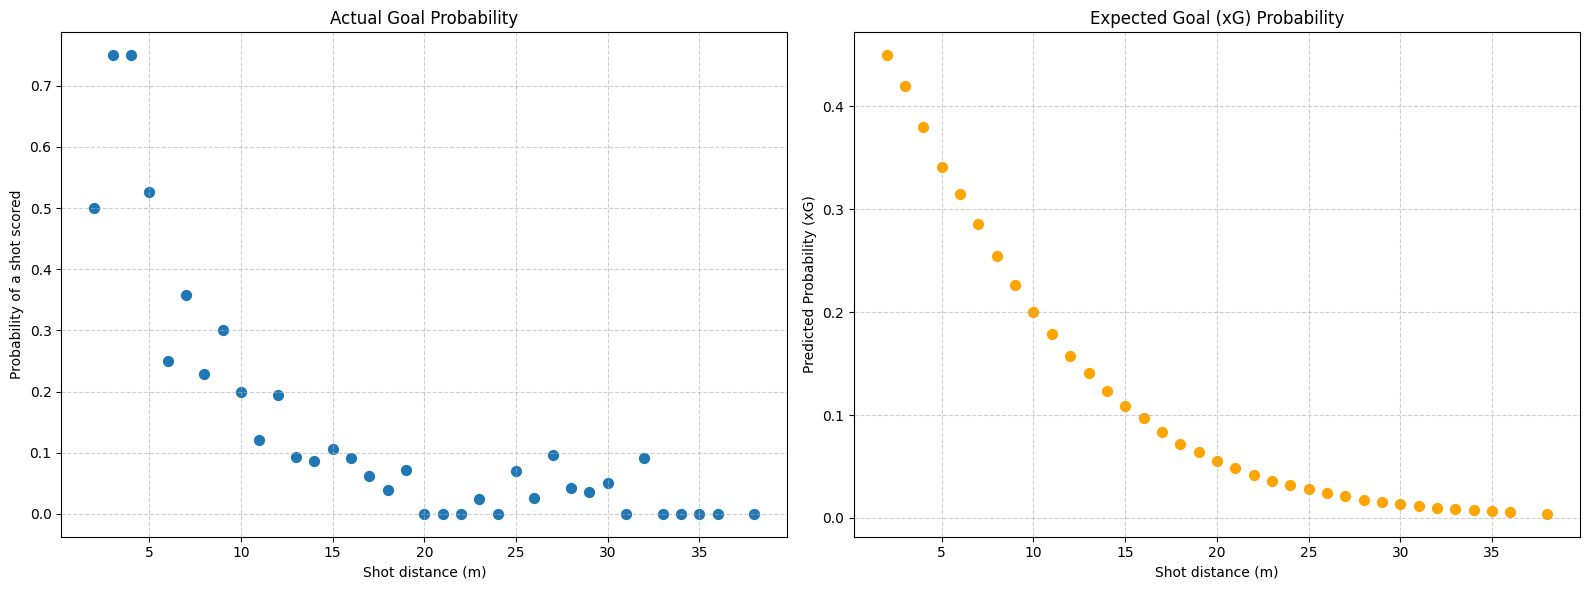

In [167]:
#슛팅거리는 1m당 득점확률로 산출
bins = np.arange(0, 50, 1) + 1
dist_cats = pd.cut(preds1['distance'], bins, right=False)
goal_per_dist = preds1.groupby(dist_cats)['goal'].mean()
xg_per_dist = preds1.groupby(dist_cats)['xg'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(bins[:-1], goal_per_dist.values, s=50)
ax1.set_title("Actual Goal Probability")
ax1.set_xlabel("Shot distance (m)")
ax1.set_ylabel("Probability of a shot scored")
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.scatter(bins[:-1], xg_per_dist.values, s=50, color='orange')
ax2.set_title("Expected Goal (xG) Probability")
ax2.set_xlabel("Shot distance (m)")
ax2.set_ylabel("Predicted Probability (xG)")
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- 슈팅 각도 구간별 득점 확률 산출

In [168]:
features_2 = ['angle']
preds2, _, _ = train(shot_features, model_type="Logistic Regression", features=features_2, scaler=None)
preds2

--- Model: LogisticRegression(max_iter=1000), Features: ['angle'] ---
  Accuracy = 0.8931
  ROC AUC = 0.7700
------------------------------


,angle,goal,xg
0,15.089514,0,0.061251
1,35.487826,0,0.151858
2,14.497838,0,0.059589
3,43.927949,0,0.213758
4,67.851156,0,0.470406
...,...,...,...
884,16.078694,0,0.064127
885,15.373600,0,0.062064
886,37.810782,1,0.167264
887,80.709117,1,0.626633


/tmp/ipython-input-137362593.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-137362593.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



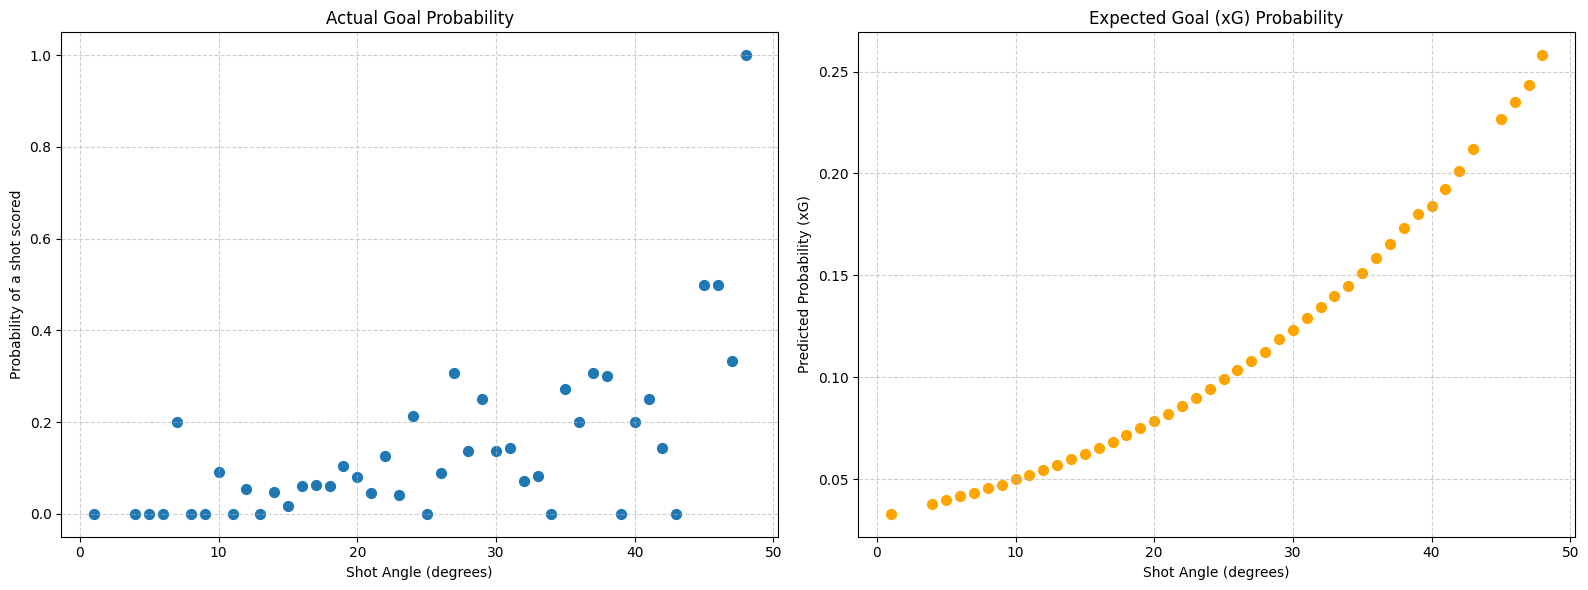

In [169]:
bins = np.arange(0, 50, 1) + 1
dist_cats = pd.cut(preds2['angle'], bins, right=False)
goal_per_angle = preds2.groupby(dist_cats)['goal'].mean()
xg_per_angle = preds2.groupby(dist_cats)['xg'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(bins[:-1], goal_per_angle.values, s=50)
ax1.set_title("Actual Goal Probability")
ax1.set_xlabel("Shot Angle (degrees)")
ax1.set_ylabel("Probability of a shot scored")
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.scatter(bins[:-1], xg_per_angle.values, s=50, color='orange')
ax2.set_title("Expected Goal (xG) Probability")
ax2.set_xlabel("Shot Angle (degrees)")
ax2.set_ylabel("Predicted Probability (xG)")
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [171]:
features_3 = ['x', 'y', 'distance', 'angle', 'freekick', 'header']
preds3, model3, scaler3 = train(shot_features, model_type="Logistic Regression", features=features_3, scaler=StandardScaler())
preds3

--- Model: LogisticRegression(max_iter=1000), Features: ['x', 'y', 'distance', 'angle', 'freekick', 'header'] ---
  Accuracy = 0.8898
  ROC AUC = 0.7669
------------------------------


,x,y,distance,angle,freekick,header,goal,xg
0,21.84,0.00,21.840000,19.026730,0,0,0,0.049332
1,14.56,-13.60,19.923694,15.529008,0,0,0,0.051849
2,23.92,-10.88,26.278143,14.497838,0,0,0,0.025144
3,20.80,-17.00,26.863358,12.132601,0,0,0,0.020942
4,12.48,9.52,15.696522,21.410168,0,0,0,0.101859
...,...,...,...,...,...,...,...,...
884,21.84,-7.48,23.085407,17.103758,0,0,0,0.039649
885,8.32,-6.12,10.328446,33.140134,0,0,1,0.219370
886,9.36,12.24,15.408673,17.005114,0,0,0,0.093213
887,11.44,0.00,11.440000,35.482074,0,0,0,0.212422


##### xG 히트맵 시각화

In [172]:
shot_grid = []
m = 50
n = 64

for x_idx in range(m):
    for y_idx in range(n):
        x = (x_idx + 0.5) * 52 / m
        y = (y_idx + 0.5) * 68 / n - 34
        shot_grid.append({'x_idx': x_idx, 'y_idx': y_idx, 'x': x, 'y': y})

shot_grid = pd.DataFrame(shot_grid)
shot_grid['distance'] = shot_grid[['x', 'y']].apply(np.linalg.norm, axis=1)

x = shot_grid['x']
y = shot_grid['y']
goal_width = 7.32
angles = np.arctan((goal_width * x) / (x ** 2 + y ** 2 - (goal_width / 2) ** 2))
shot_grid['angle'] = np.where(angles >= 0, angles, angles + np.pi) * 180 / np.pi

#구역별 xg를 계산하기위해 프리킥,헤딩은 제외
shot_grid['freekick'] = 0
shot_grid['header'] = 0

if scaler3 is not None:
  shot_grid_features = scaler3.transform(shot_grid[features_3])
else:
  shot_grid_features = shot_grid[features_3]

shot_grid['xg'] = model3.predict_proba(shot_grid_features)[:, 1]
shot_grid

,x_idx,y_idx,x,y,distance,angle,freekick,header,xg
0,0,0,0.52,-33.46875,33.472789,0.197004,0,0,0.004937
1,0,1,0.52,-32.40625,32.410422,0.210300,0,0,0.005704
2,0,2,0.52,-31.34375,31.348063,0.224996,0,0,0.006590
3,0,3,0.52,-30.28125,30.285714,0.241295,0,0,0.007612
4,0,4,0.52,-29.21875,29.223377,0.259442,0,0,0.008792
...,...,...,...,...,...,...,...,...,...
3195,49,59,51.48,29.21875,59.193967,6.161722,0,0,0.000398
3196,49,60,51.48,30.28125,59.725577,6.052930,0,0,0.000370
3197,49,61,51.48,31.34375,60.271229,5.944216,0,0,0.000344
3198,49,62,51.48,32.40625,60.830547,5.835773,0,0,0.000319


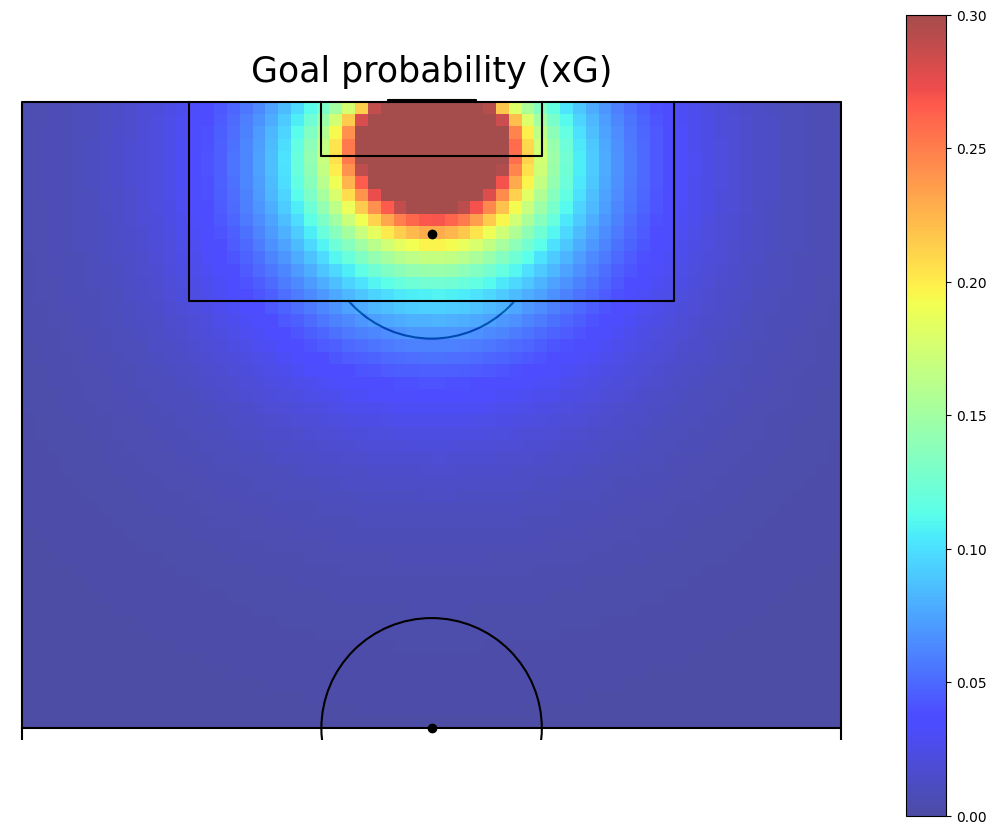

In [173]:
xg_heatmap = np.zeros((m, n))

for i in shot_grid.index:
    x_idx = shot_grid.at[i, 'x_idx']
    y_idx = shot_grid.at[i, 'y_idx']
    xg_heatmap[x_idx, y_idx] = shot_grid.at[i, 'xg']

fig, ax = draw_pitch(pitch='white', line='black', orientation='v', view='h')
img = ax.imshow(xg_heatmap, extent=[0, 68, 52, 104], vmin=0, vmax=0.3, cmap='jet', alpha=0.7)
fig.colorbar(img, ax=ax)
plt.title('Goal probability (xG)', fontdict={'size': 25})

plt.show()

## xG 집계 및 분석

##### (1) 리그 별 xG 학습

In [174]:
competitions = [x for x in os.listdir(os.path.join(DATA_DIR, 'refined_events'))]
test_competitions = ['England', 'World_Cup']
train_competitions = [x for x in competitions if x not in test_competitions]
train_competitions, test_competitions

(['France', 'Italy', 'Spain', 'Germany', 'European_Championship'],
 ['England', 'World_Cup'])

In [175]:
def get_events(competition_names):
  match_events_list = []
  for competition_name in competition_names:
      matches_path = os.path.join(DATA_DIR, "matches", f"matches_{competition_name}.json")
      with open(matches_path) as json_data:
          matches = json.load(json_data)
      match_df = pd.DataFrame(matches)

      for match_id in tqdm(match_df.wyId, desc=f"{competition_name} precessing...."):
          match_events = pd.read_pickle(os.path.join(DATA_DIR, 'refined_events', competition_name, f'{match_id}.pkl'))
          match_events['competition_name'] = competition_name
          match_events_list.append(match_events)

  return pd.concat(match_events_list, ignore_index=True)

In [176]:
train_events = get_events(train_competitions)
train_events.head()

France precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

Italy precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

Spain precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

Germany precessing....:   0%|          | 0/306 [00:00<?, ?it/s]

European_Championship precessing....:   0%|          | 0/51 [00:00<?, ?it/s]

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2501056,253304650,1H,2.256,3783,Caen,25715,R. Rodelin,Pass,Simple pass,[Accurate],52.00,32.64,33.28,22.44,France
1,2501056,253304632,1H,4.311,3783,Caen,26399,D. Da Silva,Pass,High pass,[Accurate],33.28,22.44,78.00,60.52,France
2,2501056,253304622,1H,7.686,3767,PSG,37824,T. Meunier,Duel,Air duel,"[Lost, Not accurate]",26.00,7.48,10.40,30.60,France
3,2501056,253304642,1H,8.17,3783,Caen,15004,I. Santini,Duel,Air duel,"[Won, Accurate]",78.00,60.52,93.60,37.40,France
4,2501056,253304623,1H,13.515,3767,PSG,25418,A. Aréola,Pass,Simple pass,[Accurate],10.40,30.60,21.84,46.24,France


In [177]:
test_events = get_events(test_competitions)
test_events.head()

England precessing....:   0%|          | 0/380 [00:00<?, ?it/s]

World_Cup precessing....:   0%|          | 0/64 [00:00<?, ?it/s]

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2500089,251700146,1H,2.764,1659,AFC Bournemouth,9637,J. King,Pass,Simple pass,[Accurate],52.00,34.00,41.60,37.40,England
1,2500089,251700147,1H,4.761,1659,AFC Bournemouth,8351,A. Surman,Pass,Simple pass,[Accurate],41.60,37.40,40.56,57.80,England
2,2500089,251700148,1H,5.533,1659,AFC Bournemouth,9285,C. Daniels,Pass,Simple pass,[Accurate],40.56,57.80,32.24,47.60,England
3,2500089,251700161,1H,7.708,1659,AFC Bournemouth,239411,T. Mings,Pass,High pass,[Accurate],32.24,47.60,68.64,48.96,England
4,2500089,251700149,1H,11.615,1659,AFC Bournemouth,9637,J. King,Pass,Simple pass,[Accurate],68.64,48.96,73.84,55.76,England


In [178]:
train_shots = train_events[
    (train_events['event_type'] == 'Shot') | (train_events['sub_event_type'].isin(['Free kick shot', 'Penalty']))
].reset_index(drop=True)

train_shots.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2501056,253304688,1H,196.645,3767,PSG,25440,J. Pastore,Shot,Shot,"[Right foot, Opportunity, Position: Out low le...",91.52,31.96,104.0,34.0,France
1,2501056,253304846,1H,747.997,3767,PSG,347200,C. Nkunku,Shot,Shot,"[Left foot, Opportunity, Position: Goal low ce...",92.56,31.28,104.0,34.0,France
2,2501056,253305059,1H,967.374,3783,Caen,25715,R. Rodelin,Shot,Shot,"[Head/body, Opportunity, Position: Out high ri...",92.56,36.04,104.0,34.0,France
3,2501056,253305083,1H,1014.191,3783,Caen,25715,R. Rodelin,Shot,Shot,"[Right foot, Position: Out low right, Not accu...",73.84,20.40,104.0,34.0,France
4,2501056,253305145,1H,1168.642,3783,Caen,15004,I. Santini,Shot,Shot,"[Right foot, Opportunity, Position: Out low ri...",95.68,34.00,104.0,34.0,France


In [179]:
test_shots = test_events[
    (test_events['event_type'] == 'Shot') | (test_events['sub_event_type'].isin(['Free kick shot', 'Penalty']))
].reset_index(drop=True)

test_shots.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,tags,start_x,start_y,end_x,end_y,competition_name
0,2500089,251700604,1H,1239.334,1659,AFC Bournemouth,245813,L. Mousset,Shot,Shot,"[Right foot, Opportunity, Position: Goal low c...",91.52,26.52,104.00,34.00,England
1,2500089,251700478,1H,1324.246,1646,Burnley,8980,J. Hendrick,Shot,Shot,"[Right foot, Opportunity, Position: Goal cente...",81.12,42.16,104.00,34.00,England
2,2500089,251700689,1H,1494.384,1659,AFC Bournemouth,9285,C. Daniels,Shot,Shot,"[Left foot, Opportunity, Position: Goal center...",90.48,48.28,104.00,34.00,England
3,2500089,251700693,1H,1523.716,1659,AFC Bournemouth,8351,A. Surman,Shot,Shot,"[Left foot, Blocked, Not accurate]",80.08,34.00,90.48,33.32,England
4,2500089,251700755,1H,1651.209,1659,AFC Bournemouth,9637,J. King,Shot,Shot,"[Right foot, Opportunity, Position: Out high c...",92.56,11.56,104.00,34.00,England


In [180]:
#x,y좌표는 왼쪽 아래가 (0,0)으로 설정되어있음
#상대팀골대중앙을 기준으로 (x,y)를 설정해야하므로
#(104-start_x , start_y-34)로 설정함
def get_shot_features(shots):
  shot_features = pd.DataFrame(index=shots.index)
  shot_features['x'] = 104 - shots['start_x']
  shot_features['y'] = shots['start_y'] - 34
  shot_features

  #피타고라스 거리 = norm2을 적용함
  shot_features['distance'] = shot_features[['x', 'y']].apply(np.linalg.norm, axis=1)

  x = shot_features['x']
  y = shot_features['y']
  goal_width = 7.32
  angles = np.arctan((goal_width * x) / (x ** 2 + y ** 2 - (goal_width / 2) ** 2)) * 180 / np.pi
  shot_features['angle'] = np.where(angles >= 0, angles, angles + 180)
  shot_features

  shot_features['freekick'] = (shots['event_type'] == 'Free kick').astype(int)
  shot_features['header'] = shots['tags'].apply(lambda x: 'Head/body' in x).astype(int)
  shot_features['goal'] = shots['tags'].apply(lambda x: 'Goal' in x).astype(int)

  return shot_features

In [181]:
train_shot_features = get_shot_features(train_shots)
train_shot_features

,x,y,distance,angle,freekick,header,goal
0,12.48,-2.04,12.645632,31.943715,0,0,0
1,11.44,-2.72,11.758912,33.845389,0,0,0
2,11.44,2.04,11.620465,34.544834,0,1,0
3,30.16,-13.60,33.084522,11.540735,0,0,0
4,8.32,0.00,8.320000,47.489757,0,0,0
...,...,...,...,...,...,...,...
35486,12.48,0.00,12.480000,32.689579,1,0,1
35487,28.08,21.76,35.524414,9.348321,0,0,0
35488,22.88,2.72,23.041111,17.933536,0,0,0
35489,20.80,-9.52,22.875104,16.626387,0,0,1


In [182]:
test_shot_features = get_shot_features(test_shots)
test_shot_features

,x,y,distance,angle,freekick,header,goal
0,12.48,-7.48,14.549942,24.734188,0,0,0
1,22.88,8.16,24.291562,16.194438,0,0,0
2,13.52,14.28,19.664913,14.847734,0,0,0
3,23.92,0.00,23.920000,17.398716,0,0,0
4,11.44,-22.44,25.187838,7.679526,0,0,0
...,...,...,...,...,...,...,...
10449,10.40,-6.12,12.067079,29.932171,0,1,0
10450,13.52,-12.92,18.700717,16.397129,0,0,0
10451,31.20,6.80,31.932429,12.787102,0,0,0
10452,14.56,14.28,20.393921,14.830569,0,0,1


In [183]:
features = ['x', 'y', 'distance', 'angle', 'freekick', 'header']
X_train = train_shot_features[features]
y_train = train_shot_features['goal']

X_test = test_shot_features[features]
y_test = test_shot_features['goal']

# 데이터 스케일링 (거리 기반 모델 등을 위해)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 실험할 모델
model = LogisticRegression(max_iter=1000)

# 각 모델별 학습 및 평가
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 6. 결과 출력
print(f"--- Model: {model}, Features: {features} ---")
print(f"  Accuracy = {accuracy:.4f}")
print(f"  ROC AUC = {roc_auc:.4f}")
print("-" * 30)

preds = pd.concat([pd.DataFrame(X_test, columns=features).reset_index(drop=True),
                  pd.DataFrame(y_test, columns=["goal"]).reset_index(drop=True),
                  pd.DataFrame(y_pred_proba, columns=["xg"]).reset_index(drop=True)],
                  axis=1, ignore_index=False)
preds

--- Model: LogisticRegression(max_iter=1000), Features: ['x', 'y', 'distance', 'angle', 'freekick', 'header'] ---
  Accuracy = 0.8966
  ROC AUC = 0.7807
------------------------------


,x,y,distance,angle,freekick,header,goal,xg
0,12.48,-7.48,14.549942,24.734188,0,0,0,0.123189
1,22.88,8.16,24.291562,16.194438,0,0,0,0.035623
2,13.52,14.28,19.664913,14.847734,0,0,0,0.053336
3,23.92,0.00,23.920000,17.398716,0,0,0,0.038679
4,11.44,-22.44,25.187838,7.679526,0,0,0,0.015292
...,...,...,...,...,...,...,...,...
10449,10.40,-6.12,12.067079,29.932171,0,1,0,0.069434
10450,13.52,-12.92,18.700717,16.397129,0,0,0,0.056807
10451,31.20,6.80,31.932429,12.787102,0,0,0,0.013031
10452,14.56,14.28,20.393921,14.830569,0,0,1,0.049337


In [184]:
df_shots = pd.concat([test_shots, preds], axis=1)
df_shots

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,...,end_y,competition_name,x,y,distance,angle,freekick,header,goal,xg
0,2500089,251700604,1H,1239.334,1659,AFC Bournemouth,245813,L. Mousset,Shot,Shot,...,34.00,England,12.48,-7.48,14.549942,24.734188,0,0,0,0.123189
1,2500089,251700478,1H,1324.246,1646,Burnley,8980,J. Hendrick,Shot,Shot,...,34.00,England,22.88,8.16,24.291562,16.194438,0,0,0,0.035623
2,2500089,251700689,1H,1494.384,1659,AFC Bournemouth,9285,C. Daniels,Shot,Shot,...,34.00,England,13.52,14.28,19.664913,14.847734,0,0,0,0.053336
3,2500089,251700693,1H,1523.716,1659,AFC Bournemouth,8351,A. Surman,Shot,Shot,...,33.32,England,23.92,0.00,23.920000,17.398716,0,0,0,0.038679
4,2500089,251700755,1H,1651.209,1659,AFC Bournemouth,9637,J. King,Shot,Shot,...,34.00,England,11.44,-22.44,25.187838,7.679526,0,0,0,0.015292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10449,2057954,258613574,2H,1890.677,14358,Russia,103682,R. Zobnin,Shot,Shot,...,34.00,World_Cup,10.40,-6.12,12.067079,29.932171,0,1,0,0.069434
10450,2057954,258613974,2H,2193.564,16521,Saudi Arabia,122615,Hattan Bahbir,Shot,Shot,...,25.84,World_Cup,13.52,-12.92,18.700717,16.397129,0,0,0,0.056807
10451,2057954,258613669,2H,2317.852,14358,Russia,220971,D. Kuzyaev,Shot,Shot,...,34.00,World_Cup,31.20,6.80,31.932429,12.787102,0,0,0,0.013031
10452,2057954,258613749,2H,2748.726,14358,Russia,4513,D. Cheryshev,Shot,Shot,...,34.00,World_Cup,14.56,14.28,20.393921,14.830569,0,0,1,0.049337


In [185]:
match_id = 2057987

matches_path = os.path.join(DATA_DIR, "matches", f"matches_World_Cup.json")
with open(matches_path) as json_data:
    matches = json.load(json_data)
match_df = pd.DataFrame(matches)

match_df["team_names"] = match_df.label.apply(lambda l: l.split(', ')[0])
match_df["team1_name"] = match_df.team_names.apply(
    lambda t: t.encode('ascii', 'strict').decode('unicode-escape').split(' - ')[0]
)
match_df["team2_name"] = match_df.team_names.apply(
    lambda t: t.encode('ascii', 'strict').decode('unicode-escape').split(' - ')[1]
)

match_df

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,team_names,team1_name,team2_name
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2","July 15, 2018 at 5:00:00 PM GMT+2",,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28,France - Croatia,France,Croatia
1,Played,4165367,0,"{'2413': {'scoreET': 0, 'coachId': 276858, 'si...",10078,2018-07-14 14:00:00,5629,Stadion Krestovskyi,2058016,"Belgium - England, 2 - 0","July 14, 2018 at 4:00:00 PM GMT+2",,"[{'refereeId': 380599, 'role': 'referee'}, {'r...",Regular,28,Belgium - England,Belgium,England
2,Played,4165366,0,"{'2413': {'scoreET': 1, 'coachId': 276858, 'si...",10078,2018-07-11 18:00:00,9598,Olimpiyskiy stadion Luzhniki,2058015,"Croatia - England, 2 - 1 (E)","July 11, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",ExtraTime,28,Croatia - England,Croatia,England
3,Played,4165366,0,"{'5629': {'scoreET': 0, 'coachId': 8605, 'side...",10078,2018-07-10 18:00:00,4418,Stadion Krestovskyi,2058014,"France - Belgium, 1 - 0","July 10, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28,France - Belgium,France,Belgium
4,Played,4165365,0,"{'14358': {'scoreET': 2, 'coachId': 264893, 's...",10078,2018-07-07 18:00:00,9598,Olimpiyskiy Stadion Fisht,2058012,"Russia - Croatia, 2 - 2 (P)","July 7, 2018 at 8:00:00 PM GMT+2",,"[{'refereeId': 378204, 'role': 'referee'}, {'r...",Penalties,28,Russia - Croatia,Russia,Croatia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Played,4165363,1,"{'8493': {'scoreET': 0, 'coachId': 134090, 'si...",10078,2018-06-16 10:00:00,4418,Kazan' Arena,2057966,"France - Australia, 2 - 1","June 16, 2018 at 12:00:00 PM GMT+2",Group C,"[{'refereeId': 378232, 'role': 'referee'}, {'r...",Regular,28,France - Australia,France,Australia
60,Played,4165363,1,"{'9905': {'scoreET': 0, 'coachId': 137521, 'si...",10078,2018-06-15 18:00:00,0,Olimpiyskiy Stadion Fisht,2057960,"Portugal - Spain, 3 - 3","June 15, 2018 at 8:00:00 PM GMT+2",Group B,"[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,28,Portugal - Spain,Portugal,Spain
61,Played,4165363,1,"{'10840': {'scoreET': 0, 'coachId': 136612, 's...",10078,2018-06-15 15:00:00,10840,Stadion Krestovskyi,2057961,"Morocco - Iran, 0 - 1","June 15, 2018 at 5:00:00 PM GMT+2",Group B,"[{'refereeId': 384995, 'role': 'referee'}, {'r...",Regular,28,Morocco - Iran,Morocco,Iran
62,Played,4165363,1,"{'16129': {'scoreET': 0, 'coachId': 33204, 'si...",10078,2018-06-15 12:00:00,15670,Stadion Central'nyj,2057955,"Egypt - Uruguay, 0 - 1","June 15, 2018 at 2:00:00 PM GMT+2",Group A,"[{'refereeId': 377215, 'role': 'referee'}, {'r...",Regular,28,Egypt - Uruguay,Egypt,Uruguay


In [186]:
team1_name, team2_name = match_df[match_df['wyId'] == match_id][['team1_name', 'team2_name']].values[0]

match_shots = df_shots[df_shots['match_id'] == match_id].reset_index(drop=True)
match_shots['display_name'] = match_shots.apply(
    lambda x: f"{x['player_name']}, " +
    f"{x['period']} {int(x['time'] // 60):02d}:{int(x['time'] % 60):02d}, " +
    f"xG: {round(x['xg'], 3)}", axis=1
)

#기존 start_x, start_y좌표로 변환 => 팀마다 다르게 설정해야해서
team2_x = match_shots.loc[match_shots['team_name'] == team2_name, 'x']
team1_y = match_shots.loc[match_shots['team_name'] == team1_name, 'y']
team2_y = match_shots.loc[match_shots['team_name'] == team2_name, 'y']
match_shots.loc[match_shots['team_name'] == team2_name, 'x'] = 104 - team2_x
match_shots.loc[match_shots['team_name'] == team1_name, 'y'] = 34 - team1_y
match_shots.loc[match_shots['team_name'] == team2_name, 'y'] = 34 + team2_y

match_shots.head()

,match_id,event_id,period,time,team_id,team_name,player_id,player_name,event_type,sub_event_type,...,competition_name,x,y,distance,angle,freekick,header,goal,xg,display_name
0,2057987,259956999,1H,698.173,15473,Mexico,7941,J. Hernández,Shot,Shot,...,World_Cup,91.52,27.88,13.899813,26.933236,0,1,0,0.052758,"J. Hernández, 1H 11:38, xG: 0.053"
1,2057987,259957180,1H,1275.442,14855,Korea Republic,14911,Son Heung-Min,Shot,Shot,...,World_Cup,13.52,45.56,17.788311,18.086581,0,0,0,0.067976,"Son Heung-Min, 1H 21:15, xG: 0.068"
2,2057987,259957182,1H,1277.147,14855,Korea Republic,14911,Son Heung-Min,Shot,Shot,...,World_Cup,12.48,45.56,17.011290,18.314813,0,0,0,0.074227,"Son Heung-Min, 1H 21:17, xG: 0.074"
3,2057987,259965138,1H,1281.101,14855,Korea Republic,14911,Son Heung-Min,Shot,Shot,...,World_Cup,21.84,41.48,23.085407,17.103758,0,0,0,0.039530,"Son Heung-Min, 1H 21:21, xG: 0.04"
4,2057987,259957220,1H,1339.263,14855,Korea Republic,61962,Sung-Yeung Ki,Shot,Shot,...,World_Cup,11.44,37.40,11.934555,32.982052,0,1,0,0.078959,"Sung-Yeung Ki, 1H 22:19, xG: 0.079"


##### (2) 슈팅 위치 및 xG 시각화

In [187]:
match_shots_success = match_shots[match_shots['tags'].apply(lambda x: 'Goal' in x)]
match_shots_failed = match_shots[match_shots['tags'].apply(lambda x: 'Goal' not in x)]

team1_goals = match_shots_success[match_shots_success['team_name'] == team1_name]
team2_goals = match_shots_success[match_shots_success['team_name'] == team2_name]

team1_not_goals = match_shots_failed[match_shots_failed['team_name'] == team1_name]
team2_not_goals = match_shots_failed[match_shots_failed['team_name'] == team2_name]


team1_goal_trace = go.Scatter(
    x=team1_goals['start_x'],
    y=team1_goals['start_y'],
    name=f"{team1_name}: success shot",
    text=team1_goals['display_name'],
    mode='markers',
    marker=dict(
        color='red', size=np.sqrt(team1_goals['xg']) * 50,
        symbol=team1_goals['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

team2_goal_trace = go.Scatter(
    x=team2_goals['start_x'],
    y=team2_goals['start_y'],
    name=f"{team2_name}: success shot",
    text=team2_goals['display_name'],
    mode='markers',
    marker=dict(
        color='blue', size=np.sqrt(team2_goals['xg']) * 50,
        symbol=team2_goals['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

team1_not_goal_trace = go.Scatter(
    x=team1_not_goals['start_x'],
    y=team1_not_goals['start_y'],
    name=f"{team1_name}: failed shot",
    text=match_shots_failed['display_name'],
    mode='markers',
    marker=dict(
        color='green', size=np.sqrt(match_shots_failed['xg']) * 50,
        symbol=match_shots_failed['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

team2_not_goal_trace = go.Scatter(
    x=team2_not_goals['start_x'],
    y=team2_not_goals['start_y'],
    name=f"{team2_name}: failed shot",
    text=match_shots_failed['display_name'],
    mode='markers',
    marker=dict(
        color='purple', size=np.sqrt(match_shots_failed['xg']) * 50,
        symbol=match_shots_failed['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

team1_shots = match_shots[match_shots['team_name'] == team1_name]
team2_shots = match_shots[match_shots['team_name'] == team2_name]
team1_xg = team1_shots['xg'].sum().round(2)
team2_xg = team2_shots['xg'].sum().round(2)

title = f"{team1_name} - {team2_name} (xG: {team1_xg} - {team2_xg})"
fig = go.Figure(data=[team1_not_goal_trace, team2_not_goal_trace, team1_goal_trace, team2_goal_trace], layout=get_pitch_layout(title))
fig.show()

##### (3) 선수별 시즌 전체 xG 및 부가 지표 집계

In [188]:
# 선수별 슈팅/유효슈팅/득점 횟수 집계
shots = df_shots[df_shots['competition_name'] == 'England'].reset_index(drop=True)
shots_on_target = df_shots[df_shots['tags'].apply(lambda x: 'Accurate' in x)].reset_index(drop=True)
goals = df_shots[df_shots['tags'].apply(lambda x: 'Goal' in x)].reset_index(drop=True)

player_shot_counts = shots.groupby(['team_id', 'team_name', 'player_id', 'player_name'])['event_id'].count()
player_sot_counts = shots_on_target.groupby(['team_id', 'team_name', 'player_id', 'player_name'])['event_id'].count()
player_goal_counts = goals.groupby(['team_id', 'team_name', 'player_id', 'player_name'])['event_id'].count()

player_stats = pd.concat([player_shot_counts, player_sot_counts, player_goal_counts], axis=1).fillna(0).astype(int)
player_stats.columns = ['Shots', 'SoT', 'Goals']
player_stats

Shots  SoT  Goals
team_id team_name player_id player_name                      
1609    Arsenal   3319      M. Özil            39   14      4
                  3361      A. Sánchez         69   28      7
                  3560      Nacho Monreal      21    8      5
                  7855      L. Koscielny        8    2      2
                  7856      P. Mertesacker      2    2      1
...                                           ...  ...    ...
19314   Senegal   28529     Y. Sabaly           0    1      0
                  97582     M. Konaté           0    1      0
                  256480    B. Keita            0    1      0
                  375348    M. Wagué            0    1      1
                  448079    I. Sarr             0    2      0

[692 rows x 3 columns]

In [189]:
player_stats.sort_values('Goals', ascending=False)[:20].reset_index()

,team_id,team_name,player_id,player_name,Shots,SoT,Goals
0,1612,Liverpool,120353,Mohamed Salah,142,68,32
1,1624,Tottenham Hotspur,8717,H. Kane,175,74,29
2,1625,Manchester City,8325,S. Agüero,91,42,21
3,1631,Leicester City,12829,J. Vardy,66,34,20
4,1625,Manchester City,11066,R. Sterling,80,35,18
5,1611,Manchester United,7905,R. Lukaku,80,41,16
6,1612,Liverpool,15808,Roberto Firmino,80,37,15
7,1609,Arsenal,25413,A. Lacazette,65,36,14
8,1625,Manchester City,340386,Gabriel Jesus,55,31,13
9,1610,Chelsea,25707,E. Hazard,65,34,12


In [190]:
# 선수별 xG 집계 및 정렬
player_stats['xG'] = shots.groupby(['team_id', 'team_name', 'player_id', 'player_name'])['xg'].sum()
player_stats.sort_values('xG', ascending=False)[:20].reset_index()

,team_id,team_name,player_id,player_name,Shots,SoT,Goals,xG
0,1624,Tottenham Hotspur,8717,H. Kane,175,74,29,25.735036
1,1612,Liverpool,120353,Mohamed Salah,142,68,32,19.111135
2,1625,Manchester City,11066,R. Sterling,80,35,18,15.422046
3,1625,Manchester City,8325,S. Agüero,91,42,21,15.345645
4,1611,Manchester United,7905,R. Lukaku,80,41,16,15.169959
5,1631,Leicester City,12829,J. Vardy,66,34,20,13.382514
6,1625,Manchester City,340386,Gabriel Jesus,55,31,13,12.017613
7,1609,Arsenal,25413,A. Lacazette,65,36,14,11.705828
8,1651,Brighton & Hove Albion,8416,G. Murray,50,24,12,11.163122
9,1633,West Ham United,14703,M. Arnautović,67,31,11,10.786956


##### (3) 선수별 득점-xG 차이(dG) 집계 및 정렬
- 골결정력을 판단 (주어진 xg대비 얼마나 득점을 이뤘는지)
$$ dG = 득점-xg $$

In [191]:
player_stats['dG'] = player_stats['Goals'] - player_stats['xG']
player_stats.sort_values('dG', ascending=False)[:20].reset_index()

,team_id,team_name,player_id,player_name,Shots,SoT,Goals,xG,dG
0,1612,Liverpool,120353,Mohamed Salah,142,68,32,19.111135,12.888865
1,1631,Leicester City,12829,J. Vardy,66,34,20,13.382514,6.617486
2,1612,Liverpool,15808,Roberto Firmino,80,37,15,8.471428,6.528572
3,1631,Leicester City,26150,R. Mahrez,71,36,12,5.913106,6.086894
4,1625,Manchester City,8325,S. Agüero,91,42,21,15.345645,5.654355
5,1624,Tottenham Hotspur,14911,Son Heung-Min,70,31,12,6.737279,5.262721
6,1625,Manchester City,245364,L. Sané,54,21,10,5.141573,4.858427
7,1610,Chelsea,25707,E. Hazard,65,34,12,7.474700,4.525300
8,1612,Liverpool,3802,Philippe Coutinho,52,18,7,3.439899,3.560101
9,1624,Tottenham Hotspur,8717,H. Kane,175,74,29,25.735036,3.264964


##### (4) 선수별 득점당 평균 xG 집계 및 정렬

In [192]:
#득점별 평균 xg값
#선수별 해당 골이 얼마의 xg를 보통갔는지파악
#1위인 덕배선수는 평균적으로 골의 xg값이 낮음=어려운골을 잘 넣음
player_stats['xG for goals'] = goals.groupby(['team_id', 'team_name', 'player_id', 'player_name'])['xg'].sum()
player_stats['xG per goal'] = player_stats['xG for goals'] / player_stats['Goals']
player_stats[player_stats['Goals'] >= 5].sort_values('xG per goal')[:20].reset_index()

,team_id,team_name,player_id,player_name,Shots,SoT,Goals,xG,dG,xG for goals,xG per goal
0,1625,Manchester City,38021,K. De Bruyne,91,39,7,5.437935,1.562065,0.449561,0.064223
1,1625,Manchester City,105339,Fernandinho,48,20,5,3.094571,1.905429,0.424643,0.084929
2,1639,Stoke City,49872,X. Shaqiri,67,29,8,5.321680,2.678320,0.729643,0.091205
3,1631,Leicester City,26150,R. Mahrez,71,36,12,5.913106,6.086894,1.202199,0.100183
4,1659,AFC Bournemouth,62224,R. Fraser,31,13,5,2.213319,2.786681,0.545153,0.109031
5,1651,Brighton & Hove Albion,91381,J. Izquierdo,53,16,5,4.751861,0.248139,0.634217,0.126843
6,1644,Watford,28292,A. Doucouré,44,17,7,3.753372,3.246628,0.947565,0.135366
7,1612,Liverpool,3802,Philippe Coutinho,52,18,7,3.439899,3.560101,0.987696,0.141099
8,1611,Manchester United,397178,M. Rashford,59,21,7,5.212934,1.787066,1.020483,0.145783
9,1673,Huddersfield Town,38377,L. Depoitre,20,10,6,2.948560,3.051440,0.876203,0.146034


##### (5) 선수별 시즌 전체 xG 시각화

In [193]:
player_name = 'Son Heung-Min'
# player_name = 'Mohamed Salah'
# player_name = 'K. De Bruyne'

player_shots = df_shots[(df_shots['competition_name'] == 'England') & (df_shots['player_name'] == player_name)].reset_index(drop=True)
player_goals = player_shots[player_shots['tags'].apply(lambda x: 'Goal' in x)]
player_shots_failed = player_shots[player_shots['tags'].apply(lambda x: 'Goal' not in x)]

#득점으로 연결된것 = red
goal_trace = go.Scatter(
    x=104 - player_goals['x'],
    y=34 + player_goals['y'],
    name='Goal',
    mode='markers',
    marker=dict(
        color='red', size=np.sqrt(player_goals['xg']) * 50,
        symbol=player_goals['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

#득점 실패 = darkgrey
shot_trace = go.Scatter(
    x=104 - player_shots_failed['x'],
    y=34 + player_shots_failed['y'],
    mode='markers',
    marker=dict(
        color='darkgrey', size=np.sqrt(player_shots_failed['xg']) * 50,
        symbol=player_shots_failed['freekick'].apply(lambda x: 'square' if x == 1 else 'circle')
    )
)

title = f"{player_name} - Goals: {player_shots['goal'].sum()}, xG: {round(player_shots['xg'].sum(), 3)} "
fig = go.Figure(data=[shot_trace, goal_trace], layout=get_pitch_layout(title))
fig.show()